# IDEB geolocalized by school on Rio de Janeiro (RJ)
---

### Goals
Combining the school's IDEB (SAEB + approval rate) marks with Rio de Janeiro's municipal shapefile, we hope to discover some local standards in school performance over the years. The time interval we will analyze is from 2011 until today.

### Data sources

Shapefile:
- [Escolas Municipais - GeoOpenData - Cidade do Rio de Janeiro](http://hub.arcgis.com/datasets/PCRJ::escolas-municipais)

IDEB data:
- [Resultados - INEP: Planilhas do Ideb > Escolas > Ensino Fundamental Regular - Anos Iniciais](http://portal.inep.gov.br/web/guest/educacao-basica/ideb/resultados)


### Results

- You can open the file `ideb_kepler.json` on [kepler.gl](https://kepler.gl) to see the interactive map, from 2005 to 2017! :)

### Authors
*Original code by Guilherme Almeida [here](base_code.ipynb), adapted by [Fernanda Scovino](https://github.com/fernandascovino) - 2019.*

## Import required libraries

In [1]:
# Import config
import os
import sys
sys.path.insert(0, '../')
from config import RAW_PATH, TREAT_PATH, OUTPUT_PATH

# DATA ANALYSIS & VIZ TOOLS
from copy import deepcopy

import pandas as pd
pd.options.display.max_columns = 999

import geopandas as gpd
import matplotlib.pyplot as plt
#import seaborn as sns

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 15)

# CONFIGS
#%reload_ext autoreload # for changes in .py
#%autoreload 2

#import warnings
#warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Import data

### [Shapefile: municipal schools in RJ](http://hub.arcgis.com/datasets/PCRJ::escolas-municipais)

In [2]:
os.listdir(RAW_PATH / 'shapefiles')

['Escolas%20Municipais']

In [88]:
map_municipio_rio = gpd.read_file(RAW_PATH / "shapefiles" / "Escolas%20Municipais", encoding = "utf8")

In [89]:
map_municipio_rio.tail(3)

,SMEDBOEsco,SMEDBOEs_1,SMEDBOEs_2,SMEDBOEs_3,SMEDBOEs_4,SMEDBOEs_5,SMEDBOEs_6,SMEDBOEs_7,SMEDBOEs_8,SMEDBOEs_9,SMEDBOEs10,SMEDBOEs11,SMEDBOEs12,SMEDBOEs13,SMEDBOEs14,SMEDBOEs15,SMEDBOEs16,SMEDBOEs17,SMEDBOEs18,SMEDBOEs19,SMEDBOEs20,SMEDBOEs21,SMEDBOEs22,SMEDBOEs23,SMEDBOEs24,SMEDBOEs25,SMEDBOEs26,SMEDBOEs27,SMEDBOEs28,SMEDBOEs29,SMEDBOEs30,SMEDBOEs31,SMEDBOEs32,SMEDBOEs33,SMEDBOEs34,SMEDBODado,SMEDBODa_1,SMEDBODa_2,SMEDBODa_3,SMEDBODa_4,SMEDBODa_5,SMEDBODa_6,SMEDBODa_7,SMEDBODa_8,SMEDBODa_9,SMEDBODa10,SMEDBODa11,SMEDBODa12,SMEDBODa13,SMEDBODa14,SMEDBODa15,geometry
1538,1120,011763,1026010,11763,33082693,Escola Municipal Bertha Lutz,"Rua Gabriel M. Machado, S/Nº - Enseada das Garças",151,Guaratiba,10,1,2417-1369,N,entre as Av. João Cafe Filho e Av. Sylvio Mout...,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{22CD726C-5DEE-4475-B3D8-23682842E6E7},0.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,1.0,None,1026010,EM Bertha Lutz,10.24,1186.0,10,1026010,Escola Municipal Bertha Lutz,{4F0A0AFA-AF28-4908-9E3B-B773267669C1},0.0,4.0,9.0,13.0,13.0,1.0,0.0,0.0,21.0,4.0,1026010,POINT (-43.67057996087902 -22.97906367786099)
1539,1122,011050,0817050,11050,33080810,Escola Municipal Moacyr Padilha,"Rua Gal. Gomes de Castro, 30",140,Padre Miguel,08,1,3331-2799,N,Localizada do outro lado da via,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{BEACFD38-86C4-43FE-B419-F28BAA48F874},0.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,1.0,None,817050,EM Moacyr Padilha,8.16,778.0,08,0817050,Escola Municipal Moacyr Padilha,{84AC3B3B-E13E-4AC1-87E9-2F2AABE8E9CF},0.0,0.0,2.0,7.0,7.0,0.0,0.0,0.0,10.0,0.0,0817050,POINT (-43.45065218838074 -22.86876566380888)
1540,1123,016376,1026017,16376,33140081,Escola Municipal Giuseppe Melchiori - Padre José,"Estrada do Magarça, 3.323",151,Guaratiba,10,1,3316-4885,N,"predio branco, lado direito do campo - area livre",http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{DE5E81AA-9A77-47DB-A3C0-174AFCE9D479},0.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,1.0,None,1026017,EM Giuseppe Melchiori - Pe. José,10.25,1193.0,10,1026017,Escola Municipal Giuseppe Melchiori - Padre José,{627DDAE5-9F87-4F8C-8B29-BFE1797988F6},0.0,0.0,13.0,6.0,0.0,1.0,0.0,0.0,8.0,0.0,1026017,POINT (-43.60305310285084 -22.94811973568581)


In [90]:
map_municipio_rio.shape

(1541, 52)

In [91]:
map_municipio_rio.columns

Index(['SMEDBOEsco', 'SMEDBOEs_1', 'SMEDBOEs_2', 'SMEDBOEs_3', 'SMEDBOEs_4',
       'SMEDBOEs_5', 'SMEDBOEs_6', 'SMEDBOEs_7', 'SMEDBOEs_8', 'SMEDBOEs_9',
       'SMEDBOEs10', 'SMEDBOEs11', 'SMEDBOEs12', 'SMEDBOEs13', 'SMEDBOEs14',
       'SMEDBOEs15', 'SMEDBOEs16', 'SMEDBOEs17', 'SMEDBOEs18', 'SMEDBOEs19',
       'SMEDBOEs20', 'SMEDBOEs21', 'SMEDBOEs22', 'SMEDBOEs23', 'SMEDBOEs24',
       'SMEDBOEs25', 'SMEDBOEs26', 'SMEDBOEs27', 'SMEDBOEs28', 'SMEDBOEs29',
       'SMEDBOEs30', 'SMEDBOEs31', 'SMEDBOEs32', 'SMEDBOEs33', 'SMEDBOEs34',
       'SMEDBODado', 'SMEDBODa_1', 'SMEDBODa_2', 'SMEDBODa_3', 'SMEDBODa_4',
       'SMEDBODa_5', 'SMEDBODa_6', 'SMEDBODa_7', 'SMEDBODa_8', 'SMEDBODa_9',
       'SMEDBODa10', 'SMEDBODa11', 'SMEDBODa12', 'SMEDBODa13', 'SMEDBODa14',
       'SMEDBODa15', 'geometry'],
      dtype='object')

#### Fixing columns from `map_municipio_rio`

The correspondence can be found [here](http://hub.arcgis.com/datasets/PCRJ::escolas-municipais/data) (the order is kept).

In [92]:
name_columns = 'OBJECTID 	 cod_SMA 	 DESIGNACAO 	 Chave 	 cod_INEP 	 Nome_Escola 	 endereco 	 cod_Bairro 	 Bairro 	 CRE 	 cod_atividade 	 telefones 	 flg_valida 	 OBS 	 link_cartela 	 ano_criacao 	 flg_ativa 	 Data_Inc 	 Data_Atv_Conv 	 Data_Desatv_Conv 	 Data_Atv 	 Data_Desatv 	 TP_status_RioUrbe 	 Cod_RioUrbe 	 cod_conveniada 	 GlobalID 	 Flag_Escola_Amanha 	 Flg_UPP 	 Flg_Gestao 	 Link_Foto 	 Flg_saude_escola 	 Data_Inauguracao 	 Designacao_num 	 Nome_abrev 	 Cod_microarea_SME 	 OBJECTID 	 CRE 	 DESIGNACAO 	 Nome_Escola 	 GlobalID 	 TurmasCreche 	 TurmasPreEscola 	 TurmasCA 	 TurmasPrimario 	 TurmasGinasio 	 TurmasCe 	 TurmasProjetos 	 TurmasPeja 	 SalasAula 	 TurmasEI 	 Designa'
name_columns = name_columns.lower().split()
name_columns

['objectid',
 'cod_sma',
 'designacao',
 'chave',
 'cod_inep',
 'nome_escola',
 'endereco',
 'cod_bairro',
 'bairro',
 'cre',
 'cod_atividade',
 'telefones',
 'flg_valida',
 'obs',
 'link_cartela',
 'ano_criacao',
 'flg_ativa',
 'data_inc',
 'data_atv_conv',
 'data_desatv_conv',
 'data_atv',
 'data_desatv',
 'tp_status_riourbe',
 'cod_riourbe',
 'cod_conveniada',
 'globalid',
 'flag_escola_amanha',
 'flg_upp',
 'flg_gestao',
 'link_foto',
 'flg_saude_escola',
 'data_inauguracao',
 'designacao_num',
 'nome_abrev',
 'cod_microarea_sme',
 'objectid',
 'cre',
 'designacao',
 'nome_escola',
 'globalid',
 'turmascreche',
 'turmaspreescola',
 'turmasca',
 'turmasprimario',
 'turmasginasio',
 'turmasce',
 'turmasprojetos',
 'turmaspeja',
 'salasaula',
 'turmasei',
 'designa']

In [93]:
dict_map = dict(zip(map_municipio_rio.columns, name_columns))
dict_map

{'SMEDBOEsco': 'objectid',
 'SMEDBOEs_1': 'cod_sma',
 'SMEDBOEs_2': 'designacao',
 'SMEDBOEs_3': 'chave',
 'SMEDBOEs_4': 'cod_inep',
 'SMEDBOEs_5': 'nome_escola',
 'SMEDBOEs_6': 'endereco',
 'SMEDBOEs_7': 'cod_bairro',
 'SMEDBOEs_8': 'bairro',
 'SMEDBOEs_9': 'cre',
 'SMEDBOEs10': 'cod_atividade',
 'SMEDBOEs11': 'telefones',
 'SMEDBOEs12': 'flg_valida',
 'SMEDBOEs13': 'obs',
 'SMEDBOEs14': 'link_cartela',
 'SMEDBOEs15': 'ano_criacao',
 'SMEDBOEs16': 'flg_ativa',
 'SMEDBOEs17': 'data_inc',
 'SMEDBOEs18': 'data_atv_conv',
 'SMEDBOEs19': 'data_desatv_conv',
 'SMEDBOEs20': 'data_atv',
 'SMEDBOEs21': 'data_desatv',
 'SMEDBOEs22': 'tp_status_riourbe',
 'SMEDBOEs23': 'cod_riourbe',
 'SMEDBOEs24': 'cod_conveniada',
 'SMEDBOEs25': 'globalid',
 'SMEDBOEs26': 'flag_escola_amanha',
 'SMEDBOEs27': 'flg_upp',
 'SMEDBOEs28': 'flg_gestao',
 'SMEDBOEs29': 'link_foto',
 'SMEDBOEs30': 'flg_saude_escola',
 'SMEDBOEs31': 'data_inauguracao',
 'SMEDBOEs32': 'designacao_num',
 'SMEDBOEs33': 'nome_abrev',
 'SME

In [94]:
map_municipio_rio = map_municipio_rio.rename(dict_map, axis='columns')
map_municipio_rio.head(2)

,objectid,cod_sma,designacao,chave,cod_inep,nome_escola,endereco,cod_bairro,bairro,cre,cod_atividade,telefones,flg_valida,obs,link_cartela,ano_criacao,flg_ativa,data_inc,data_atv_conv,data_desatv_conv,data_atv,data_desatv,tp_status_riourbe,cod_riourbe,cod_conveniada,globalid,flag_escola_amanha,flg_upp,flg_gestao,link_foto,flg_saude_escola,data_inauguracao,designacao_num,nome_abrev,cod_microarea_sme,objectid,cre,designacao,nome_escola,globalid,turmascreche,turmaspreescola,turmasca,turmasprimario,turmasginasio,turmasce,turmasprojetos,turmaspeja,salasaula,turmasei,designa,geometry
0,1124,016379,1026018,16379,33140111,Escola Municipal Emma D'Avila de Camillis,"Rua Várzea de Palma, S/Nº",151,Guaratiba,10,1,3305-8970,N,"Lote13, Quadra 12, proximo a rua Materlandia",http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{F17E15D7-E919-4160-9DF4-302ECEACB674},0.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,0.0,None,1026018,EM Emma D'Avila de Camillis,10.27,1194.0,10,1026018,Escola Municipal Emma D'Avila de Camillis,{B4A18543-015E-43CF-9464-CBA85ADF5BAF},0.0,3.0,6.0,6.0,6.0,0.0,0.0,0.0,11.0,3.0,1026018,POINT (-43.63601828509798 -22.98632664816865)
1,1125,016387,1019060,16387,33140120,Escola Municipal Manoel Porto Filho,"Rua Pirapetinga, S/Nº",148,Paciência,10,1,3409-7579,N,"Entre as r. Para Sempre, Fulgor e Angulos Jubi...",http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{78E667C0-39C7-4BF5-823C-01089E62CCFD},1.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,1.0,None,1019060,EM Manoel Porto Filho,10.19,1108.0,10,1019060,Escola Municipal Manoel Porto Filho,{9073C806-C05E-4374-95FA-2BE52932C2E4},0.0,0.0,0.0,7.0,12.0,2.0,1.0,0.0,12.0,0.0,1019060,POINT (-43.63061141412631 -22.92095886212502)


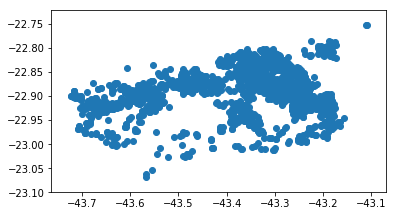

In [95]:
map_municipio_rio.plot()

In [159]:
map_municipio_rio.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 52 columns):
objectid              1541 non-null int64
cod_sma               1372 non-null object
designacao            1541 non-null object
chave                 1307 non-null object
cod_inep              1304 non-null object
nome_escola           1541 non-null object
endereco              1524 non-null object
cod_bairro            1541 non-null object
bairro                1541 non-null object
cre                   1541 non-null object
cod_atividade         1541 non-null int64
telefones             1099 non-null object
flg_valida            1198 non-null object
obs                   437 non-null object
link_cartela          1300 non-null object
ano_criacao           16 non-null object
flg_ativa             1541 non-null int64
data_inc              1394 non-null object
data_atv_conv         0 non-null object
data_desatv_conv      0 non-null object
data_atv              1383 non-null o

### [IDEB: municipal schools in Rio de Janeiro](http://portal.inep.gov.br/web/guest/educacao-basica/ideb/resultados)

> ### O que é o Ideb
>O Índice de Desenvolvimento da Educação Básica (Ideb) foi criado em 2007 e reúne, em um só indicador, os resultados de dois conceitos igualmente importantes para a qualidade da educação: o fluxo escolar e as médias de desempenho nas avaliações.
>
> Ele é calculado a partir dos dados sobre **aprovação escolar, obtidos no Censo Escolar**, e das médias de desempenho nas avaliações do Inep, o **Sistema de Avaliação da Educação Básica (Saeb) – para as unidades da federação** e para o país, e a Prova Brasil – para os municípios.


* [How IDEB is calculated](http://download.inep.gov.br/educacao_basica/portal_ideb/o_que_e_o_ideb/Nota_Tecnica_n1_concepcaoIDEB.pdf)

All the data that is used to calculate IDEB and the indicaator itself can be downloaded [here](http://portal.inep.gov.br/web/guest/educacao-basica/ideb/resultados). It has multiple levels of aggregations you can choose, from country level (macro) to school level (micro). 

We will use the data from schools level, and only the first years (primary education), that can be found on the website in `Planilhas do Ideb > Escolas > Ensino Fundamental Regular - Anos Iniciais`.

#### You can jump direct to [here](#ideb_rj)!

In this section, we treat the raw data and filter the municipal schools in Rio de Janeiro. The new table is saved in `DATA_PATH`

In [11]:
os.listdir(RAW_PATH / 'ideb')

['divulgacao_anos_iniciais-escolas-2017.xlsx']

In [12]:
ideb_geral = pd.read_excel(RAW_PATH / 'ideb' / 'divulgacao_anos_iniciais-escolas-2017.xlsx', 
                           encoding = "latin1", skiprows=4)

In [13]:
ideb_geral.head()

,Sigla da UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Rede,Taxa de Aprovação - 2005,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Taxa de Aprovação - 2007,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Taxa de Aprovação - 2009,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Taxa de Aprovação - 2011,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Taxa de Aprovação - 2013,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Taxa de Aprovação - 2015,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Taxa de Aprovação - 2017,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Nota SAEB - 2005,Unnamed: 56,Unnamed: 57,Nota SAEB - 2007,Unnamed: 59,Unnamed: 60,Nota SAEB - 2009,Unnamed: 62,Unnamed: 63,Nota SAEB - 2011,Unnamed: 65,Unnamed: 66,Nota SAEB - 2013,Unnamed: 68,Unnamed: 69,Nota SAEB - 2015,Unnamed: 71,Unnamed: 72,Nota SAEB - 2017,Unnamed: 74,Unnamed: 75,IDEB 2005 (N x P),IDEB 2007 (N x P),IDEB 2009 (N x P),IDEB 2011 (N x P),IDEB 2013 (N x P),IDEB 2015 (N x P),IDEB 2017 (N x P),Projeções,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,2009,2011,2013,2015,2017,2019,2021
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RO,1100015.0,Alta Floresta D'Oeste,11024666.0,EMEIEF BOA ESPERANCA,Municipal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,97.9,100,100,100,100,90,0.978261,97.4,100,100,100,94.1,95.8,0.979136,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,209.26,193.66,5.47866,224.05,191.78,5.72673,-,-,-,-,-,5.4,5.6,-,-,-,-,-,5.6,5.9,6.1
4,RO,1100015.0,Alta Floresta D'Oeste,11024682.0,EEEF EURIDICE LOPES PEDROSO,Estadual,93.1,-,100,93.7,93,91,0.943084,92,100,100,87.9,93.6,92.2,0.945067,89,100,100,74.5,86.2,92.3,0.895127,92.6,100,97.7,81.6,92.2,93.3,0.924994,93.1,98,97.3,83,90.6,96.7,0.927497,94.7,100,98.8,86,91.1,98.8,0.946114,95.5,-,-,93.2,94,98.7,0.952392,181.551,164.825,4.42558,185.03,166.87,4.52916,202.34,174.8,5.00368,211.93,173.05,5.15488,219.46,201.27,5.81168,227.07,210.35,6.122,256.25,244.34,7.29687,4.2,4.3,4.5,4.8,5.4,5.8,6.9,4.2,4.6,5,5.3,5.5,5.8,6.1,6.3


#### Treat columns

In [14]:
cols = ideb_geral.columns
cols

Index(['Sigla da UF', 'Código do Município', 'Nome do Município',
       'Código da Escola', 'Nome da Escola', 'Rede',
       'Taxa de Aprovação - 2005', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Taxa de Aprovação - 2007',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Taxa de Aprovação - 2009', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Taxa de Aprovação - 2011', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Taxa de Aprovação - 2013', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Taxa de Aprovação - 2015',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Taxa de Aprovação - 2017', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unn

In [15]:
new_cols_name = ['sigla_uf', 'cod_municipio', 'nome_municipio', 'cod_inep', 'nome_escola', 'rede']

In [16]:
anos = [2005 + 2*i for i in range(7)]
anos

[2005, 2007, 2009, 2011, 2013, 2015, 2017]

In [17]:
taxa = ['taxa_aprovacao_{}_{}'.format(ano, serie) for ano in anos for serie in ['todos']+list(range(1,6))+['indicador']]
taxa

['taxa_aprovacao_2005_todos',
 'taxa_aprovacao_2005_1',
 'taxa_aprovacao_2005_2',
 'taxa_aprovacao_2005_3',
 'taxa_aprovacao_2005_4',
 'taxa_aprovacao_2005_5',
 'taxa_aprovacao_2005_indicador',
 'taxa_aprovacao_2007_todos',
 'taxa_aprovacao_2007_1',
 'taxa_aprovacao_2007_2',
 'taxa_aprovacao_2007_3',
 'taxa_aprovacao_2007_4',
 'taxa_aprovacao_2007_5',
 'taxa_aprovacao_2007_indicador',
 'taxa_aprovacao_2009_todos',
 'taxa_aprovacao_2009_1',
 'taxa_aprovacao_2009_2',
 'taxa_aprovacao_2009_3',
 'taxa_aprovacao_2009_4',
 'taxa_aprovacao_2009_5',
 'taxa_aprovacao_2009_indicador',
 'taxa_aprovacao_2011_todos',
 'taxa_aprovacao_2011_1',
 'taxa_aprovacao_2011_2',
 'taxa_aprovacao_2011_3',
 'taxa_aprovacao_2011_4',
 'taxa_aprovacao_2011_5',
 'taxa_aprovacao_2011_indicador',
 'taxa_aprovacao_2013_todos',
 'taxa_aprovacao_2013_1',
 'taxa_aprovacao_2013_2',
 'taxa_aprovacao_2013_3',
 'taxa_aprovacao_2013_4',
 'taxa_aprovacao_2013_5',
 'taxa_aprovacao_2013_indicador',
 'taxa_aprovacao_2015_todos',


In [18]:
new_cols_name  = new_cols_name  + taxa
len(new_cols_name)

55

In [19]:
saeb = ['saeb_{}_{}'.format(ano, mod) for ano in anos for mod in ['mat', 'pt', 'media_padrao']]
saeb

['saeb_2005_mat',
 'saeb_2005_pt',
 'saeb_2005_media_padrao',
 'saeb_2007_mat',
 'saeb_2007_pt',
 'saeb_2007_media_padrao',
 'saeb_2009_mat',
 'saeb_2009_pt',
 'saeb_2009_media_padrao',
 'saeb_2011_mat',
 'saeb_2011_pt',
 'saeb_2011_media_padrao',
 'saeb_2013_mat',
 'saeb_2013_pt',
 'saeb_2013_media_padrao',
 'saeb_2015_mat',
 'saeb_2015_pt',
 'saeb_2015_media_padrao',
 'saeb_2017_mat',
 'saeb_2017_pt',
 'saeb_2017_media_padrao']

In [20]:
new_cols_name  = new_cols_name + saeb
len(new_cols_name)

76

In [21]:
ideb = ['ideb_{}'.format(ano) for ano in anos]
ideb

['ideb_2005',
 'ideb_2007',
 'ideb_2009',
 'ideb_2011',
 'ideb_2013',
 'ideb_2015',
 'ideb_2017']

In [22]:
new_cols_name  = new_cols_name + ideb
len(new_cols_name)

83

In [23]:
projecoes = ['projecoes_{}'.format(ano) for ano in anos[1:]+['2019', '2021']]
projecoes

['projecoes_2007',
 'projecoes_2009',
 'projecoes_2011',
 'projecoes_2013',
 'projecoes_2015',
 'projecoes_2017',
 'projecoes_2019',
 'projecoes_2021']

In [24]:
new_cols_name  = new_cols_name + projecoes
len(new_cols_name)

91

In [25]:
len(cols)

91

In [26]:
ideb_dic_cols = dict(zip(new_cols_name, cols))
ideb_dic_cols

{'sigla_uf': 'Sigla da UF',
 'cod_municipio': 'Código do Município',
 'nome_municipio': 'Nome do Município',
 'cod_inep': 'Código da Escola',
 'nome_escola': 'Nome da Escola',
 'rede': 'Rede',
 'taxa_aprovacao_2005_todos': 'Taxa de Aprovação - 2005',
 'taxa_aprovacao_2005_1': 'Unnamed: 7',
 'taxa_aprovacao_2005_2': 'Unnamed: 8',
 'taxa_aprovacao_2005_3': 'Unnamed: 9',
 'taxa_aprovacao_2005_4': 'Unnamed: 10',
 'taxa_aprovacao_2005_5': 'Unnamed: 11',
 'taxa_aprovacao_2005_indicador': 'Unnamed: 12',
 'taxa_aprovacao_2007_todos': 'Taxa de Aprovação - 2007',
 'taxa_aprovacao_2007_1': 'Unnamed: 14',
 'taxa_aprovacao_2007_2': 'Unnamed: 15',
 'taxa_aprovacao_2007_3': 'Unnamed: 16',
 'taxa_aprovacao_2007_4': 'Unnamed: 17',
 'taxa_aprovacao_2007_5': 'Unnamed: 18',
 'taxa_aprovacao_2007_indicador': 'Unnamed: 19',
 'taxa_aprovacao_2009_todos': 'Taxa de Aprovação - 2009',
 'taxa_aprovacao_2009_1': 'Unnamed: 21',
 'taxa_aprovacao_2009_2': 'Unnamed: 22',
 'taxa_aprovacao_2009_3': 'Unnamed: 23',
 'tax

In [27]:
# Rename cols treated and drop old ones
ideb_geral.columns = ideb_dic_cols.keys()
ideb_geral = ideb_geral.drop([0,1,2], axis='index')
ideb_geral.head()

,sigla_uf,cod_municipio,nome_municipio,cod_inep,nome_escola,rede,taxa_aprovacao_2005_todos,taxa_aprovacao_2005_1,taxa_aprovacao_2005_2,taxa_aprovacao_2005_3,taxa_aprovacao_2005_4,taxa_aprovacao_2005_5,taxa_aprovacao_2005_indicador,taxa_aprovacao_2007_todos,taxa_aprovacao_2007_1,taxa_aprovacao_2007_2,taxa_aprovacao_2007_3,taxa_aprovacao_2007_4,taxa_aprovacao_2007_5,taxa_aprovacao_2007_indicador,taxa_aprovacao_2009_todos,taxa_aprovacao_2009_1,taxa_aprovacao_2009_2,taxa_aprovacao_2009_3,taxa_aprovacao_2009_4,taxa_aprovacao_2009_5,taxa_aprovacao_2009_indicador,taxa_aprovacao_2011_todos,taxa_aprovacao_2011_1,taxa_aprovacao_2011_2,taxa_aprovacao_2011_3,taxa_aprovacao_2011_4,taxa_aprovacao_2011_5,taxa_aprovacao_2011_indicador,taxa_aprovacao_2013_todos,taxa_aprovacao_2013_1,taxa_aprovacao_2013_2,taxa_aprovacao_2013_3,taxa_aprovacao_2013_4,taxa_aprovacao_2013_5,taxa_aprovacao_2013_indicador,taxa_aprovacao_2015_todos,taxa_aprovacao_2015_1,taxa_aprovacao_2015_2,taxa_aprovacao_2015_3,taxa_aprovacao_2015_4,taxa_aprovacao_2015_5,taxa_aprovacao_2015_indicador,taxa_aprovacao_2017_todos,taxa_aprovacao_2017_1,taxa_aprovacao_2017_2,taxa_aprovacao_2017_3,taxa_aprovacao_2017_4,taxa_aprovacao_2017_5,taxa_aprovacao_2017_indicador,saeb_2005_mat,saeb_2005_pt,saeb_2005_media_padrao,saeb_2007_mat,saeb_2007_pt,saeb_2007_media_padrao,saeb_2009_mat,saeb_2009_pt,saeb_2009_media_padrao,saeb_2011_mat,saeb_2011_pt,saeb_2011_media_padrao,saeb_2013_mat,saeb_2013_pt,saeb_2013_media_padrao,saeb_2015_mat,saeb_2015_pt,saeb_2015_media_padrao,saeb_2017_mat,saeb_2017_pt,saeb_2017_media_padrao,ideb_2005,ideb_2007,ideb_2009,ideb_2011,ideb_2013,ideb_2015,ideb_2017,projecoes_2007,projecoes_2009,projecoes_2011,projecoes_2013,projecoes_2015,projecoes_2017,projecoes_2019,projecoes_2021
3,RO,1100015.0,Alta Floresta D'Oeste,11024666.0,EMEIEF BOA ESPERANCA,Municipal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,97.9,100,100,100,100,90,0.978261,97.4,100,100,100,94.1,95.8,0.979136,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,209.26,193.66,5.47866,224.05,191.78,5.72673,-,-,-,-,-,5.4,5.6,-,-,-,-,-,5.6,5.9,6.1
4,RO,1100015.0,Alta Floresta D'Oeste,11024682.0,EEEF EURIDICE LOPES PEDROSO,Estadual,93.1,-,100,93.7,93,91,0.943084,92,100,100,87.9,93.6,92.2,0.945067,89,100,100,74.5,86.2,92.3,0.895127,92.6,100,97.7,81.6,92.2,93.3,0.924994,93.1,98,97.3,83,90.6,96.7,0.927497,94.7,100,98.8,86,91.1,98.8,0.946114,95.5,-,-,93.2,94,98.7,0.952392,181.551,164.825,4.42558,185.03,166.87,4.52916,202.34,174.8,5.00368,211.93,173.05,5.15488,219.46,201.27,5.81168,227.07,210.35,6.122,256.25,244.34,7.29687,4.2,4.3,4.5,4.8,5.4,5.8,6.9,4.2,4.6,5,5.3,5.5,5.8,6.1,6.3
5,RO,1100015.0,Alta Floresta D'Oeste,11024828.0,EMEIEF IZIDORO STEDILE,Municipal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,84.4,96,85.7,25,79.4,88,0.581102,91.2,96.4,83.9,96.2,85.7,100,0.919861,85.7,94.7,68,85.3,88.2,95.8,0.850844,97.8,100,100,100,96,92.9,0.976926,94.3,100,100,100,88.6,90,0.954239,-,-,-,-,-,-,194.63,157.09,4.53455,-,-,-,-,-,-,208.37,177.01,5.15894,202.24,183.98,5.16869,-,-,2.6,-,-,5,4.9,-,-,3.2,3.5,3.8,4.1,4.4,4.7
6,RO,1100015.0,Alta Floresta D'Oeste,11024968.0,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,89.4,-,100,82.9,88.1,90.1,0.898629,94.3,-,100,80,94,98.4,0.923768,93.4,95.8,100,58.8,95,98.3,0.859927,85.6,100,100,81.4,83.3,75,0.867707,93.1,-,100,100,98.1,84.7,0.95238,91.6,-,-,-,93.1,90.9,0.919868,-,-,-,-,-,-,-,198.774,177.659,4.9876,204.11,180.41,5.13946,211.58,188.54,5.42984,209.4,173.47,5.11424,233.84,213.73,6.31265,236.2,218.29,6.4406,-,-,-,4.5,4.7,4.7,4.4,6,5.9,-,4.5,4.9,5.3,5.5,5.8,6.1,6.3,6.6
7,RO,1100015.0,Alta Floresta D'Oeste,11025077.0,EMEIEF MARIA DE SOUZA PEGO,Municipal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,85.9,100,70,100,81.8,87.5,0.862973,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,201,195.11,5.34739,-,-,-,-,-,-,4.6,-,-,-,-,-,-,4.9,5.2


In [28]:
# Identifying INEP notes at the end of df
ideb_geral.tail()

,sigla_uf,cod_municipio,nome_municipio,cod_inep,nome_escola,rede,taxa_aprovacao_2005_todos,taxa_aprovacao_2005_1,taxa_aprovacao_2005_2,taxa_aprovacao_2005_3,taxa_aprovacao_2005_4,taxa_aprovacao_2005_5,taxa_aprovacao_2005_indicador,taxa_aprovacao_2007_todos,taxa_aprovacao_2007_1,taxa_aprovacao_2007_2,taxa_aprovacao_2007_3,taxa_aprovacao_2007_4,taxa_aprovacao_2007_5,taxa_aprovacao_2007_indicador,taxa_aprovacao_2009_todos,taxa_aprovacao_2009_1,taxa_aprovacao_2009_2,taxa_aprovacao_2009_3,taxa_aprovacao_2009_4,taxa_aprovacao_2009_5,taxa_aprovacao_2009_indicador,taxa_aprovacao_2011_todos,taxa_aprovacao_2011_1,taxa_aprovacao_2011_2,taxa_aprovacao_2011_3,taxa_aprovacao_2011_4,taxa_aprovacao_2011_5,taxa_aprovacao_2011_indicador,taxa_aprovacao_2013_todos,taxa_aprovacao_2013_1,taxa_aprovacao_2013_2,taxa_aprovacao_2013_3,taxa_aprovacao_2013_4,taxa_aprovacao_2013_5,taxa_aprovacao_2013_indicador,taxa_aprovacao_2015_todos,taxa_aprovacao_2015_1,taxa_aprovacao_2015_2,taxa_aprovacao_2015_3,taxa_aprovacao_2015_4,taxa_aprovacao_2015_5,taxa_aprovacao_2015_indicador,taxa_aprovacao_2017_todos,taxa_aprovacao_2017_1,taxa_aprovacao_2017_2,taxa_aprovacao_2017_3,taxa_aprovacao_2017_4,taxa_aprovacao_2017_5,taxa_aprovacao_2017_indicador,saeb_2005_mat,saeb_2005_pt,saeb_2005_media_padrao,saeb_2007_mat,saeb_2007_pt,saeb_2007_media_padrao,saeb_2009_mat,saeb_2009_pt,saeb_2009_media_padrao,saeb_2011_mat,saeb_2011_pt,saeb_2011_media_padrao,saeb_2013_mat,saeb_2013_pt,saeb_2013_media_padrao,saeb_2015_mat,saeb_2015_pt,saeb_2015_media_padrao,saeb_2017_mat,saeb_2017_pt,saeb_2017_media_padrao,ideb_2005,ideb_2007,ideb_2009,ideb_2011,ideb_2013,ideb_2015,ideb_2017,projecoes_2007,projecoes_2009,projecoes_2011,projecoes_2013,projecoes_2015,projecoes_2017,projecoes_2019,projecoes_2021
59923,DF,5300108.0,Brasília,53068220.0,EC DOM BOSCO,Estadual,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,78.1,-,-,-,80.1,77,0.785194,89,95.1,96,76.1,89.4,89.5,0.886032,88.8,93.1,92.9,79.2,100,73.6,0.866272,93.2,97,98.3,85,100,86.5,0.929236,-,-,-,-,-,-,-,-,-,219.05,198.56,5.75458,219.78,206.93,5.92069,220.4,207.18,5.93707,235.16,224.2,6.5282,-,-,-,4.5,5.2,5.1,6.1,-,-,-,4.8,5.1,5.3,5.6,5.9
59924,DF,5300108.0,Brasília,53068238.0,EC VILA BURITIS,Estadual,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,92.2,99.1,99.5,85,89.5,92.2,0.927215,95.6,100,99.3,89.7,99.5,92.2,0.959417,90.4,96.5,98.7,83.3,84.4,92,0.905516,95.2,100,100,87,99.5,93.4,0.956917,-,-,-,-,-,-,-,-,-,212.63,196.37,5.59224,206.86,191.46,5.39285,216.78,211.69,5.94998,214.73,206.98,5.82523,-,-,-,5.2,5.2,5.4,5.6,-,-,-,5.4,5.7,6,6.2,6.4
59925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59926,Fonte: MEC/Inep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59927,Notas: ND - Número de participantes no SAEB in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
notas = ideb_geral['sigla_uf'][59927]
notas

'Notas: ND - Número de participantes no SAEB insuficiente para que os resultados sejam divulgados.\n           ND* - Solicitação de não divulgação conforme Portaria Inep nº 410 de 03 de novembro de 2011 ou Portaria Inep nº 304 de 24 de junho de 2013.\n           ND** - Não divulgado por solicitação da Secretaria/Escola por situações adversas no momento da aplicação do SAEB 2013.\n           (*) - Média calculada a partir dos resultados dos alunos nas avaliações estaduais, em decorrência do extravio de provas e impossibilidade do cálculo da proficiência para o SAEB.'

In [30]:
# Drop INEP notes from df
ideb_geral = ideb_geral.drop([59925, 59926, 59927], axis='index')

In [31]:
ideb_geral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59922 entries, 3 to 59924
Data columns (total 91 columns):
sigla_uf                         59922 non-null object
cod_municipio                    59922 non-null float64
nome_municipio                   59922 non-null object
cod_inep                         59922 non-null float64
nome_escola                      59922 non-null object
rede                             59922 non-null object
taxa_aprovacao_2005_todos        59922 non-null object
taxa_aprovacao_2005_1            59922 non-null object
taxa_aprovacao_2005_2            59922 non-null object
taxa_aprovacao_2005_3            59922 non-null object
taxa_aprovacao_2005_4            59922 non-null object
taxa_aprovacao_2005_5            59922 non-null object
taxa_aprovacao_2005_indicador    59922 non-null object
taxa_aprovacao_2007_todos        59922 non-null object
taxa_aprovacao_2007_1            59922 non-null object
taxa_aprovacao_2007_2            59922 non-null object
taxa_apro

In [32]:
ideb_geral.sigla_uf.unique()

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [33]:
ideb_geral.rede.unique()

array(['Municipal', 'Estadual', 'Federal'], dtype=object)

In [39]:
ideb_rio = ideb_geral[(ideb_geral.sigla_uf == 'RJ') & (ideb_geral.rede == 'Municipal')]

In [40]:
ideb_rio.nome_municipio.unique()

array(['Angra dos Reis', 'Aperibé', 'Araruama', 'Areal',
       'Armação dos Búzios', 'Arraial do Cabo', 'Barra do Piraí',
       'Barra Mansa', 'Belford Roxo', 'Bom Jardim',
       'Bom Jesus do Itabapoana', 'Cabo Frio', 'Cachoeiras de Macacu',
       'Cambuci', 'Carapebus', 'Comendador Levy Gasparian',
       'Campos dos Goytacazes', 'Cantagalo', 'Cardoso Moreira', 'Carmo',
       'Casimiro de Abreu', 'Conceição de Macabu', 'Cordeiro',
       'Duas Barras', 'Duque de Caxias', 'Engenheiro Paulo de Frontin',
       'Guapimirim', 'Iguaba Grande', 'Itaboraí', 'Itaguaí', 'Italva',
       'Itaocara', 'Itaperuna', 'Itatiaia', 'Japeri', 'Laje do Muriaé',
       'Macaé', 'Macuco', 'Magé', 'Mangaratiba', 'Maricá', 'Mendes',
       'Mesquita', 'Miguel Pereira', 'Miracema', 'Natividade',
       'Nilópolis', 'Niterói', 'Nova Friburgo', 'Nova Iguaçu',
       'Paracambi', 'Paraíba do Sul', 'Paraty', 'Paty do Alferes',
       'Petrópolis', 'Pinheiral', 'Piraí', 'Porciúncula', 'Porto Real',
       'Q

<a id=ideb_rj></a>
#### Filter municipal schools in Rio de Janeiro

In [41]:
#ideb_rio = ideb_rio[ideb_rio['nome_municipio'] == 'Rio de Janeiro']
#ideb_rio.to_csv(TREAT_PATH / 'ideb_rio.csv')
ideb_rio = pd.read_csv(TREAT_PATH / 'ideb_rj.csv')

In [43]:
ideb_rio.head(2)

,sigla_uf,cod_municipio,nome_municipio,cod_inep,nome_escola,rede,taxa_aprovacao_2005_todos,taxa_aprovacao_2005_1,taxa_aprovacao_2005_2,taxa_aprovacao_2005_3,taxa_aprovacao_2005_4,taxa_aprovacao_2005_5,taxa_aprovacao_2005_indicador,taxa_aprovacao_2007_todos,taxa_aprovacao_2007_1,taxa_aprovacao_2007_2,taxa_aprovacao_2007_3,taxa_aprovacao_2007_4,taxa_aprovacao_2007_5,taxa_aprovacao_2007_indicador,taxa_aprovacao_2009_todos,taxa_aprovacao_2009_1,taxa_aprovacao_2009_2,taxa_aprovacao_2009_3,taxa_aprovacao_2009_4,taxa_aprovacao_2009_5,taxa_aprovacao_2009_indicador,taxa_aprovacao_2011_todos,taxa_aprovacao_2011_1,taxa_aprovacao_2011_2,taxa_aprovacao_2011_3,taxa_aprovacao_2011_4,taxa_aprovacao_2011_5,taxa_aprovacao_2011_indicador,taxa_aprovacao_2013_todos,taxa_aprovacao_2013_1,taxa_aprovacao_2013_2,taxa_aprovacao_2013_3,taxa_aprovacao_2013_4,taxa_aprovacao_2013_5,taxa_aprovacao_2013_indicador,taxa_aprovacao_2015_todos,taxa_aprovacao_2015_1,taxa_aprovacao_2015_2,taxa_aprovacao_2015_3,taxa_aprovacao_2015_4,taxa_aprovacao_2015_5,taxa_aprovacao_2015_indicador,taxa_aprovacao_2017_todos,taxa_aprovacao_2017_1,taxa_aprovacao_2017_2,taxa_aprovacao_2017_3,taxa_aprovacao_2017_4,taxa_aprovacao_2017_5,taxa_aprovacao_2017_indicador,saeb_2005_mat,saeb_2005_pt,saeb_2005_media_padrao,saeb_2007_mat,saeb_2007_pt,saeb_2007_media_padrao,saeb_2009_mat,saeb_2009_pt,saeb_2009_media_padrao,saeb_2011_mat,saeb_2011_pt,saeb_2011_media_padrao,saeb_2013_mat,saeb_2013_pt,saeb_2013_media_padrao,saeb_2015_mat,saeb_2015_pt,saeb_2015_media_padrao,saeb_2017_mat,saeb_2017_pt,saeb_2017_media_padrao,ideb_2005,ideb_2007,ideb_2009,ideb_2011,ideb_2013,ideb_2015,ideb_2017,projecoes_2007,projecoes_2009,projecoes_2011,projecoes_2013,projecoes_2015,projecoes_2017,projecoes_2019,projecoes_2021
38095,RJ,3304557.0,Rio de Janeiro,33062358.0,0101501 CIEP HENFIL,Municipal,100,100,100,100,100,100,1,-,-,-,-,-,-,-,93,96.8,92.1,87.5,93.1,-,0.922551,86.5,92.1,80.8,86.4,83.5,93.7,0.870224,75.8,86.5,90.8,61.2,67.4,78.2,0.751447,78.3,89.2,95.3,58.4,79.8,73,0.768555,80.6,85.4,90.8,66.1,79.6,87,0.807644,174.108,165.07,4.28799,-,-,-,-,-,-,190.41,174.7,4.77419,188.73,173.05,4.71213,204.6,188.36,5.29336,218.97,203.94,5.85087,4.3,-,-,4.2,3.5,4.1,4.7,4.4,4.7,5.1,5.4,5.6,5.9,6.1,6.4
38096,RJ,3304557.0,Rio de Janeiro,33062420.0,0101004 ESCOLA MUNICIPAL BENJAMIN CONSTANT,Municipal,76.4,100,100,71.6,63.3,68,0.775553,93.9,100,93.2,100,86.6,94.8,0.946513,89.5,100,100,76.6,91.8,85.7,0.899011,88,94.7,89.1,77.8,85.9,93.2,0.877077,66.3,75.6,85.4,52.9,64.8,69,0.677823,62.9,68.8,92.9,56.8,64.3,50,0.637293,90,-,-,96,78.8,100,0.906152,189.849,188.29,5.01058,191.78,175.6,4.8167,229.1,201.31,5.99637,243.43,221.16,6.63075,235.21,211.02,6.28952,223.28,221.27,6.24821,213.5,200.2,5.67848,3.9,4.6,5.4,5.8,4.3,4,5.1,4,4.3,4.7,5,5.3,5.5,5.8,6.1


In [44]:
ideb_rio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 38095 to 38984
Data columns (total 91 columns):
sigla_uf                         867 non-null object
cod_municipio                    867 non-null float64
nome_municipio                   867 non-null object
cod_inep                         867 non-null float64
nome_escola                      867 non-null object
rede                             867 non-null object
taxa_aprovacao_2005_todos        867 non-null object
taxa_aprovacao_2005_1            867 non-null object
taxa_aprovacao_2005_2            867 non-null object
taxa_aprovacao_2005_3            867 non-null object
taxa_aprovacao_2005_4            867 non-null object
taxa_aprovacao_2005_5            867 non-null object
taxa_aprovacao_2005_indicador    867 non-null object
taxa_aprovacao_2007_todos        867 non-null object
taxa_aprovacao_2007_1            867 non-null object
taxa_aprovacao_2007_2            867 non-null object
taxa_aprovacao_2007_3            867 no

### Merging to get IDEB results from school w/ lat-long

<a id=key></a>
#### Checking unique key: `cod_inep`

* IDEB dataframe

In [65]:
ideb_rio[['cod_inep']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 38095 to 38984
Data columns (total 1 columns):
cod_inep    867 non-null object
dtypes: object(1)
memory usage: 13.5+ KB


In [49]:
ideb_rio.cod_inep.value_counts()

33086028.0    1
33069450.0    1
33081794.0    1
33077932.0    1
33179131.0    1
33077983.0    1
33062439.0    1
33062498.0    1
33062455.0    1
33079102.0    1
33062471.0    1
33062463.0    1
33086095.0    1
33081816.0    1
33080631.0    1
33086133.0    1
33080445.0    1
33070873.0    1
33081840.0    1
33086168.0    1
33062757.0    1
33069336.0    1
33068755.0    1
33086184.0    1
33069360.0    1
33074313.0    1
33085420.0    1
33077894.0    1
33062420.0    1
33062447.0    1
             ..
33076880.0    1
33081085.0    1
33078106.0    1
33078157.0    1
33080062.0    1
33078181.0    1
33087288.0    1
33086885.0    1
33086508.0    1
33087300.0    1
33094489.0    1
33079200.0    1
33079196.0    1
33079161.0    1
33079110.0    1
33079080.0    1
33094551.0    1
33086842.0    1
33087105.0    1
33064210.0    1
33067155.0    1
33143978.0    1
33064172.0    1
33078386.0    1
33078360.0    1
33078335.0    1
33078300.0    1
33078262.0    1
33078220.0    1
33080429.0    1
Name: cod_inep, Length: 

* Shapefile dataframe

In [160]:
# We have multiple and/or NaN values here! It doesn't match the lenght of df.
map_municipio_rio[['cod_inep', 'geometry']].info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 2 columns):
cod_inep    1304 non-null object
geometry    1541 non-null object
dtypes: object(2)
memory usage: 24.2+ KB


In [52]:
v = map_municipio_rio.cod_inep.value_counts()
v2 = v[v > 1]
v2

<null>      5
<Null>      2
33143960    2
33065985    2
33467250    2
Name: cod_inep, dtype: int64

In [53]:
map_municipio_rio.loc[map_municipio_rio.cod_inep.str.contains('<null>|<Null>') == True, 'cod_inep'] = np.nan

In [54]:
# Schools with unique cod_escola
sum(v[v == 1])

1291

In [55]:
# Schools with duplicated cod_escola
v = map_municipio_rio.cod_inep.value_counts()
v2 = v[v > 1]
v2

33143960    2
33467250    2
33065985    2
Name: cod_inep, dtype: int64

In [56]:
# Schools with no cod_escola
len(map_municipio_rio[map_municipio_rio.cod_inep.isnull() == True])

244

Checking the duplicated `cod_inep` from `map_municipio_rio` on `ideb_rj`:

In [57]:
ideb_rj[ideb_rj.cod_inep.isin(v2.index)]

,sigla_uf,cod_municipio,nome_municipio,cod_inep,nome_escola,rede,taxa_aprovacao_2005_todos,taxa_aprovacao_2005_1,taxa_aprovacao_2005_2,taxa_aprovacao_2005_3,taxa_aprovacao_2005_4,taxa_aprovacao_2005_5,taxa_aprovacao_2005_indicador,taxa_aprovacao_2007_todos,taxa_aprovacao_2007_1,taxa_aprovacao_2007_2,taxa_aprovacao_2007_3,taxa_aprovacao_2007_4,taxa_aprovacao_2007_5,taxa_aprovacao_2007_indicador,taxa_aprovacao_2009_todos,taxa_aprovacao_2009_1,taxa_aprovacao_2009_2,taxa_aprovacao_2009_3,taxa_aprovacao_2009_4,taxa_aprovacao_2009_5,taxa_aprovacao_2009_indicador,taxa_aprovacao_2011_todos,taxa_aprovacao_2011_1,taxa_aprovacao_2011_2,taxa_aprovacao_2011_3,taxa_aprovacao_2011_4,taxa_aprovacao_2011_5,taxa_aprovacao_2011_indicador,taxa_aprovacao_2013_todos,taxa_aprovacao_2013_1,taxa_aprovacao_2013_2,taxa_aprovacao_2013_3,taxa_aprovacao_2013_4,taxa_aprovacao_2013_5,taxa_aprovacao_2013_indicador,taxa_aprovacao_2015_todos,taxa_aprovacao_2015_1,taxa_aprovacao_2015_2,taxa_aprovacao_2015_3,taxa_aprovacao_2015_4,taxa_aprovacao_2015_5,taxa_aprovacao_2015_indicador,taxa_aprovacao_2017_todos,taxa_aprovacao_2017_1,taxa_aprovacao_2017_2,taxa_aprovacao_2017_3,taxa_aprovacao_2017_4,taxa_aprovacao_2017_5,taxa_aprovacao_2017_indicador,saeb_2005_mat,saeb_2005_pt,saeb_2005_media_padrao,saeb_2007_mat,saeb_2007_pt,saeb_2007_media_padrao,saeb_2009_mat,saeb_2009_pt,saeb_2009_media_padrao,saeb_2011_mat,saeb_2011_pt,saeb_2011_media_padrao,saeb_2013_mat,saeb_2013_pt,saeb_2013_media_padrao,saeb_2015_mat,saeb_2015_pt,saeb_2015_media_padrao,saeb_2017_mat,saeb_2017_pt,saeb_2017_media_padrao,ideb_2005,ideb_2007,ideb_2009,ideb_2011,ideb_2013,ideb_2015,ideb_2017,projecoes_2007,projecoes_2009,projecoes_2011,projecoes_2013,projecoes_2015,projecoes_2017,projecoes_2019,projecoes_2021
38936,RJ,3304557.0,Rio de Janeiro,33143960.0,1019811 EDI PROFESSORA RAQUEL KELLY LANERA,Municipal,95,-,-,-,92.6,97,0.947489,96.5,-,-,-,96.4,96.6,0.964999,90.4,-,-,-,95.5,83.8,0.892683,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,166.675,158.406,4.02498,183.39,172.8,4.60568,208.15,186.6,5.32911,-,-,-,-,-,-,-,-,-,-,-,-,3.8,4.4,4.8,-,-,-,-,3.9,4.2,4.6,4.9,5.2,5.5,5.7,6


In [58]:
map_municipio_rio[map_municipio_rio.cod_inep.isin(v2.index)].sort_values('cod_inep')

,objectid,cod_sma,designacao,chave,cod_inep,nome_escola,endereco,cod_bairro,bairro,cre,cod_atividade,telefones,flg_valida,obs,link_cartela,ano_criacao,flg_ativa,data_inc,data_atv_conv,data_desatv_conv,data_atv,data_desatv,tp_status_riourbe,cod_riourbe,cod_conveniada,globalid,flag_escola_amanha,flg_upp,flg_gestao,link_foto,flg_saude_escola,data_inauguracao,designacao_num,nome_abrev,cod_microarea_sme,objectid,cre,designacao,nome_escola,globalid,turmascreche,turmaspreescola,turmasca,turmasprimario,turmasginasio,turmasce,turmasprojetos,turmaspeja,salasaula,turmasei,designa,geometry
361,1900,011474,0107802,11474,33065985,Espaço de Desenvolvimento Infantil Morro dos T...,"Rua Jupará, 91",11,Mangueira,01,4,3860-7971,N,é a casa contígua abaixo na altura da curva,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{B98F78C4-36FD-4046-89CE-95576047CAEB},0.0,1.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,1.0,None,107802,EDI M. dos Telégrafos,1.3,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,POINT (-43.23669603112867 -22.90028697441423)
417,5751,None,0107016,None,33065985,Escola Municipal Josué de Souza Montello,Rua Campo de São Cristovão 115 entrada 171,10,São Cristovão,01,1,2233-5666,None,Desmembramento da E.M. Gonçalves Dias,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,None,None,None,None,None,NaN,None,None,{3FB1A14F-9AB2-4019-96F9-22496E0484B4},NaN,0.0,0,None,NaN,2013-12-31T00:00:00.000Z,107016,EM Josué de Souza Montello,1.4,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,POINT (-43.2202142104476 -22.89920290612616)
20,1151,019112,1019065,19112,33143960,Escola Municipal Mario Lago,"Rua Trinta - confluência com as ruas 1, 28 e 2...",148,Paciência,10,1,3426-3013,N,"localização errada, fica no meio das ruas 28 e...",http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{391CA328-4A15-4192-A48F-27444B747ED8},0.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,1.0,None,1019065,EM Mario Lago,10.1,1113.0,10,1019065,Escola Municipal Mario Lago,{13CCFC37-8D75-4F68-AD7F-31425E794CEE},0.0,0.0,8.0,12.0,2.0,2.0,0.0,0.0,10.0,0.0,1019065,POINT (-43.63100142976461 -22.87246252099052)
348,1886,017970,1019811,17970,33143960,Espaço de Desenvolvimento Infantil Professora ...,"Estrada de Manguariba, 391",148,Paciência,10,4,2413-6120,S,None,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:25.000Z,None,None,2013-01-22T21:15:52.000Z,None,0.0,None,None,{03CCA40B-D040-4ED6-A9A7-16550287BFE2},0.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,1.0,2016-11-03T00:00:00.000Z,1019811,EDI Profª Raquel Kelly Lanera,10.1,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,POINT (-43.63450314652317 -22.87565984247859)
168,1313,042488,1019073,42488,33467250,Escola Municipal Professor Francisco José Antônio,"Avenida 4, S/N - Conjunto Nova Veridiana",149,Santa Cruz,10,1,None,None,None,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{9BEF08D8-7E28-4926-8FA4-9D17F3FC2A45},0.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,1.0,2009-12-31T00:00:00.000Z,1019073,EM Prof° Francisco José Antônio,10.16,1121.0,10,1019073,Escola Municipal Professor Francisco José Antônio,{B8DBEC7F-6136-4F63-93D0-02F6E405C4FF},1.0,5.0,8.0,4.0,0.0,0.0,0.0,0.0,8.0,6.0,1019073,POINT (-43.666541322205 -22.94117516401252)
171,1317,042501,0625616,42501,33467250,Creche Municipal Professor Rogério Pedro Batista,"Rua Cristóvão Xavier Lopes, 120",110,Coelho Neto,06,2,None,None,None,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{93869632-63B9-4357-92D3-3BBAA2201046},0.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,1.0,2009-12-31T00:0

#### Merging unique `cod_inep` from both dataframes

In [62]:
ideb_rio['cod_inep'] = ideb_rio['cod_inep'].apply(lambda x: str(int(x)))

In [60]:
map_unique = map_municipio_rio[map_municipio_rio.cod_inep.isin(v[v == 1].index) == True]

In [106]:
ideb

['ideb_2005',
 'ideb_2007',
 'ideb_2009',
 'ideb_2011',
 'ideb_2013',
 'ideb_2015',
 'ideb_2017']

In [165]:
merged = map_unique[['cod_inep', 'nome_abrev', 'geometry']].merge(ideb_rio[['nome_escola', 'cod_inep'] + ideb], 
                                                                  on='cod_inep')
merged.tail(3)

,cod_inep,nome_abrev,geometry,nome_escola,ideb_2005,ideb_2007,ideb_2009,ideb_2011,ideb_2013,ideb_2015,ideb_2017
814,33082693,EM BERTHA LUTZ,POINT (-43.67057996087902 -22.97906367786099),1026010 ESCOLA MUNICIPAL BERTHA LUTZ,3.8,4.7,4.4,5.4,4.7,6,5.7
815,33080810,EM MOACYR PADILHA,POINT (-43.45065218838074 -22.86876566380888),0817050 ESCOLA MUNICIPAL MOACYR PADILHA,4.4,5.1,5.8,4.7,5.4,5.8,5.1
816,33140081,EM GIUSEPPE MELCHIORI - PE. JOSÉ,POINT (-43.60305310285084 -22.94811973568581),1026017 ESCOLA MUNICIPAL GIUSEPPE MELCHIORI - ...,4.3,4.2,4.9,5.2,5.5,5.2,6


In [163]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 817 entries, 0 to 816
Data columns (total 11 columns):
cod_inep       817 non-null object
nome_abrev     817 non-null object
geometry       817 non-null object
nome_escola    817 non-null object
ideb_2005      817 non-null object
ideb_2007      817 non-null object
ideb_2009      817 non-null object
ideb_2011      817 non-null object
ideb_2013      817 non-null object
ideb_2015      817 non-null object
ideb_2017      817 non-null object
dtypes: object(11)
memory usage: 76.6+ KB


In [166]:
merged.ideb_2011.value_counts()[:3]

-      121
5.5     48
5.6     41
Name: ideb_2011, dtype: int64

In [190]:
for col in ideb:
    merged[col] = merged[col].replace('-', np.nan).astype(float)

In [191]:
merged.head(3)

,cod_inep,nome_abrev,geometry,nome_escola,ideb_2005,ideb_2007,ideb_2009,ideb_2011,ideb_2013,ideb_2015,ideb_2017
0,33140111,EM EMMA D'AVILA DE CAMILLIS,POINT (-43.63601828509798 -22.98632664816865),1026018 ESCOLA MUNICIPAL EMMA DAVILA DE CAMILLIS,3.6,3.6,4.3,5.5,4.9,5.0,5.4
1,33140120,EM MANOEL PORTO FILHO,POINT (-43.63061141412631 -22.92095886212502),1019060 ESCOLA MUNICIPAL MANOEL PORTO FILHO,4.0,4.4,NaN,NaN,NaN,NaN,NaN
2,33140154,EM PROF° JORGE GONÇALVES FARINHA,POINT (-43.65817006396811 -22.93248534941013),1019059 ESCOLA MUNICIPAL PROFESSOR JORGE GONCA...,4.0,4.8,5.1,5.2,5.2,5.0,NaN


In [194]:
merged.to_csv(OUTPUT_PATH / 'ideb_merged.csv')

#### Setting for [kepler.gl](kepler.gl)

In [224]:
merged.head(2)

,cod_inep,nome_abrev,geometry,nome_escola,ideb_2005,ideb_2007,ideb_2009,ideb_2011,ideb_2013,ideb_2015,ideb_2017
0,33140111,EM EMMA D'AVILA DE CAMILLIS,POINT (-43.63601828509798 -22.98632664816865),1026018 ESCOLA MUNICIPAL EMMA DAVILA DE CAMILLIS,3.6,3.6,4.3,5.5,4.9,5.0,5.4
1,33140120,EM MANOEL PORTO FILHO,POINT (-43.63061141412631 -22.92095886212502),1019060 ESCOLA MUNICIPAL MANOEL PORTO FILHO,4.0,4.4,NaN,NaN,NaN,NaN,NaN


In [265]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 817 entries, 0 to 816
Data columns (total 11 columns):
cod_inep       817 non-null object
nome_abrev     817 non-null object
geometry       817 non-null object
nome_escola    817 non-null object
ideb_2005      709 non-null float64
ideb_2007      726 non-null float64
ideb_2009      710 non-null float64
ideb_2011      696 non-null float64
ideb_2013      662 non-null float64
ideb_2015      624 non-null float64
ideb_2017      603 non-null float64
dtypes: float64(7), object(4)
memory usage: 76.6+ KB


In [267]:
kepler = gpd.GeoDataFrame(columns=['cod_inep', 'nome_abrev', 'geometry', 'nome_escola', 'ano', 'ideb'], 
                          geometry='geometry')

for ano in anos:
    
    col = 'ideb_{}'.format(ano)
    df = merged[['cod_inep', 'nome_abrev', 'geometry', 'nome_escola', col]]
    
    #df['ano'] = pd.to_datetime(ano, format='%Y')
    df['ano'] = pd.Timestamp(year=ano, month=1, day=1, hour=12, minute=0, second=0)
    df = df.rename({col: 'ideb'}, axis='columns')
    
    #print(df.columns)
    kepler = pd.concat([kepler, df], ignore_index=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [268]:
#kepler['ano'] = pd.to_datetime(kepler['ano'], format='%Y')
kepler.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5719 entries, 0 to 5718
Data columns (total 6 columns):
ano            5719 non-null datetime64[ns]
cod_inep       5719 non-null object
geometry       5719 non-null object
ideb           4730 non-null float64
nome_abrev     5719 non-null object
nome_escola    5719 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 268.2+ KB


In [269]:
kepler.tail(2)

,ano,cod_inep,geometry,ideb,nome_abrev,nome_escola
5717,2017-01-01 12:00:00,33080810,POINT (-43.45065218838074 -22.86876566380888),5.1,EM MOACYR PADILHA,0817050 ESCOLA MUNICIPAL MOACYR PADILHA
5718,2017-01-01 12:00:00,33140081,POINT (-43.60305310285084 -22.94811973568581),6.0,EM GIUSEPPE MELCHIORI - PE. JOSÉ,1026017 ESCOLA MUNICIPAL GIUSEPPE MELCHIORI - ...


In [270]:
kepler['lon'] = kepler.geometry.x
kepler['lat'] = kepler.geometry.y

In [290]:
kepler = kepler.dropna(subset=['ideb'])
kepler.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4730 entries, 0 to 5718
Data columns (total 8 columns):
ano            4730 non-null datetime64[ns]
cod_inep       4730 non-null object
geometry       4730 non-null object
ideb           4730 non-null float64
nome_abrev     4730 non-null object
nome_escola    4730 non-null object
lon            4730 non-null float64
lat            4730 non-null float64
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 332.6+ KB


In [277]:
kepler.head(2)

,ano,cod_inep,geometry,ideb,nome_abrev,nome_escola,lon,lat
0,2005-01-01 12:00:00,33140111,POINT (-43.63601828509798 -22.98632664816865),3.6,EM EMMA D'AVILA DE CAMILLIS,1026018 ESCOLA MUNICIPAL EMMA DAVILA DE CAMILLIS,-43.636018,-22.986327
1,2005-01-01 12:00:00,33140120,POINT (-43.63061141412631 -22.92095886212502),4.0,EM MANOEL PORTO FILHO,1019060 ESCOLA MUNICIPAL MANOEL PORTO FILHO,-43.630611,-22.920959


In [338]:
c = kepler[['ano', 'cod_inep']].groupby('ano').count()
c.index = list(map(lambda x: x.year, list(c.index)))
c

,cod_inep
2005,709
2007,726
2009,710
2011,696
2013,662
2015,624
2017,603


In [339]:
c2 = ideb_rio[ideb].replace('-', np.nan).count()
c2.index = c.index
c2 = pd.DataFrame(data=c2, columns=['cod_inep'])
c2

,cod_inep
2005,726
2007,742
2009,726
2011,712
2013,682
2015,643
2017,632


In [341]:
# Percentage of school that have IDEB marks, but don't maatch the shapefile
(c2 - c)/c2

,cod_inep
2005,0.023416
2007,0.021563
2009,0.022039
2011,0.022472
2013,0.029326
2015,0.029549
2017,0.045886


In [278]:
kepler.to_csv(OUTPUT_PATH / 'ideb_merged_kepler.csv')

### LATER: Treat on rows that didn't match

* Checking those that doesn't have `cod_inep` by matching `ideb_rio.nome_escola` with `map_unique.nome_abrev`: